In [1]:
timezone = {#地区时区
  "United States": "UTC-5:00",
  "Netherlands": "UTC+1:00",
  "Switzerland": "UTC+1:00",
  "Germany": "UTC+1:00",
  "China": "UTC+8:00",
  "France": "UTC+1:00",
  "United Kingdom": "UTC±0:00",
  "Canada": "UTC-5:00",
  "Australia": "UTC+10:00",
  "Bulgaria": "UTC+2:00",
  "Malaysia": "UTC+8:00",
  "Finland": "UTC+2:00",
  "South Korea": "UTC+9:00",
  "Japan": "UTC+9:00",
  "Italy": "UTC+1:00",
  "Egypt": "UTC+2:00",
  "New Zealand": "UTC+12:00",
  "Belgium": "UTC+1:00",
  "Poland": "UTC+1:00",
  "Hungary": "UTC+1:00",
  "Austria": "UTC+1:00",
  "Lebanon": "UTC+2:00",
  "Denmark": "UTC+1:00",
  "Colombia": "UTC-5:00",
  "Indonesia": "UTC+7:00",
  "United Arab Emirates": "UTC+4:00",
  "Ecuador": "UTC-5:00",
  "Sweden": "UTC+1:00",
  "India": "UTC+5:30",
  "Czechia": "UTC+1:00",
  "Spain": "UTC+1:00",
  "Pakistan": "UTC+5:00",
  "Brazil": "UTC-3:00",
  "Kenya": "UTC+3:00",
  "Russia": "UTC+3:00",
  "Vietnam": "UTC+7:00",
  "Singapore": "UTC+8:00",
  "Portugal": "UTC±0:00",
  "Turkiye": "UTC+3:00",
  "Ireland": "UTC±0:00",
  "Greece": "UTC+2:00",
  "Ethiopia": "UTC+3:00",
  "Georgia": "UTC+4:00",
  "Norway": "UTC+1:00",
  "Tunisia": "UTC+1:00",
  "Estonia": "UTC+2:00",
  "Israel": "UTC+2:00",
  "South Africa": "UTC+2:00",
  "Slovenia": "UTC+1:00",
  "Lithuania": "UTC+2:00",
  "Taiwan": "UTC+8:00",
  "Hong Kong": "UTC+8:00"
}

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#文件未上传github因为已经大于100MB
data = pd.read_csv(r"./data/users_combined_info_500.csv")
v = []
tmpl = data['country']
for x in tmpl:
    if x not in timezone.keys():
        v.append("Unknow")
    else:
        v.append(timezone[x])

data.insert(loc=0,column='timezone',value=v)

#提取每个人的信息
feature = ['user_id','name','location','country','timezone']
num_data = pd.DataFrame(data[feature])
num_data=num_data.drop_duplicates().reset_index(drop=True)

### 1.人口统计分析

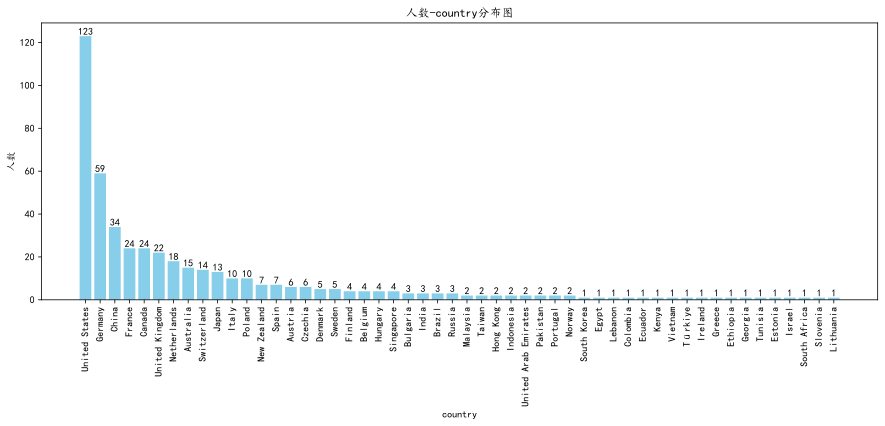

In [3]:
plt.rcParams['font.sans-serif'] = 'kaiti'
plt.rcParams['axes.unicode_minus']=False
country = dict()

def getNum(loc:str,save:dict):
    for _ in num_data[loc]:
        if pd.isna(_):
            continue
        if _ in save.keys():
            save[_]+=1
        else:
            save[_]=1

#用于画loc列元素出现次数条形图
def showNum(loc:str,save:dict,num:int):#num为展示前num个数据，-1为全部
    getNum(loc,save)
    save = dict(sorted(save.items(),key=lambda item:item[1],reverse=True))
    if num==-1:
        num=len(save.items())
    save = dict(list(save.items())[:num])
    plt.figure(figsize=(15,5))
    pg=plt.bar(range(len(save.keys())),save.values(),color='skyblue')
    plt.bar_label(pg,label_type='edge')
    plt.xticks(range(len(save.keys())),save.keys(), rotation='vertical')
    plt.title("人数-{}分布图".format(loc))
    plt.ylabel('人数')
    plt.xlabel('{}'.format(loc))

#统计每个内地区开发者情况(前30多的)
def showLocationOfCountry(coun:str,loca:str):
    return
showNum('country',country,-1)
plt.show()

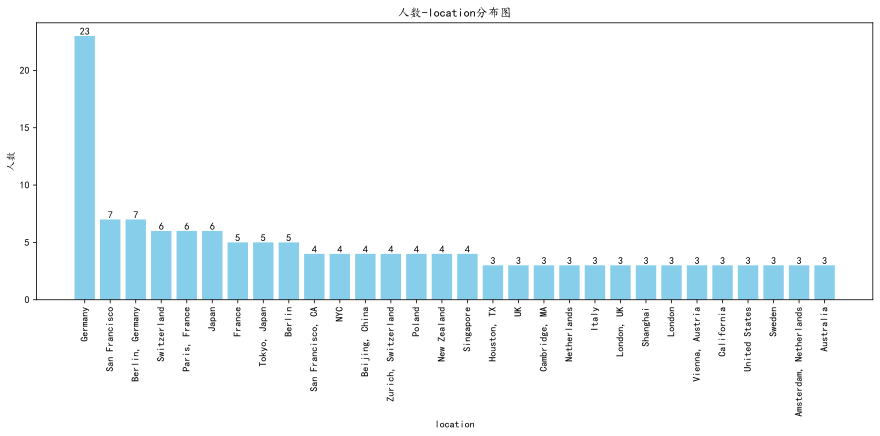

In [4]:
location = dict()
showNum('location',location,30)
plt.show()

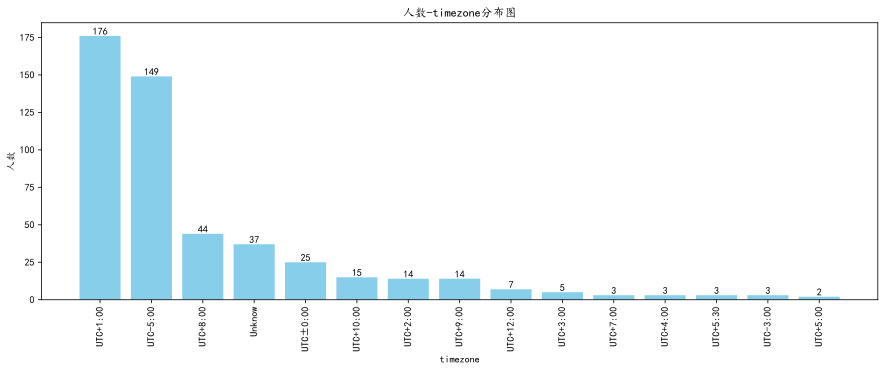

In [5]:
times = dict()
showNum("timezone",times,-1)

### 2. 协作行为分析

In [6]:
name = set()
for _name in data['name']:
    name.add(_name)
pushtims=dict()
ndata = data[data['event_type']=='PushEvent']
for x in name:
    pushtims[x]=ndata[ndata['name']==x].shape[0]

#输出提交次数从大到小排序后的结果
pushtims = dict(sorted(pushtims.items(),key=lambda kv:kv[1],reverse=True))
pushtims

{'MilosKozak': 35993,
 'arlac77': 14460,
 'danielroe': 9160,
 'PX4BuildBot': 8273,
 'ConfluentSemaphore': 7836,
 'taiki-e': 4985,
 'bot-targa': 4617,
 'chenrui333': 4494,
 'ornicar': 4118,
 'Ghost-chu': 3885,
 'LinuxServer-CI': 3539,
 'XuehaiPan': 3163,
 'khipp': 3148,
 'matthuisman': 3065,
 'bdraco': 2972,
 'frenck': 2953,
 'Exorcism0666': 2879,
 'mauro-balades': 2647,
 'Jason2866': 2481,
 'SimonCropp': 2209,
 'NickCao': 1985,
 'SuperSandro2000': 1966,
 'vmoens': 1933,
 'cdce8p': 1843,
 'ChrisRackauckas': 1811,
 'mcm1957': 1806,
 'melloware': 1680,
 'gwolf2u': 1678,
 'eldy': 1661,
 'fire': 1612,
 'nijel': 1584,
 'gaborcsardi': 1571,
 'ankane': 1494,
 'brianchandotcom': 1467,
 'terrymanu': 1435,
 'stipsan': 1426,
 'glenn-jocher': 1365,
 'martincostello': 1346,
 'moosebuild': 1343,
 'tianon': 1336,
 'charliermarsh': 1330,
 'mencian': 1314,
 'sdelamo': 1308,
 'AskAlexSharov': 1284,
 'Koenkk': 1280,
 'rouault': 1264,
 'kdy1': 1228,
 'suzuki-shunsuke': 1227,
 'ryanbr': 1222,
 'avik-pal': 1

#### 高活跃用户
可以将贡献值（对应这里给出的数值）相对较高的一部分用户视为高活跃用户，比如选取贡献值大于等于 1000 的用户，以下是部分示例（仅列举前面一些符合条件的用户）：
- MilosKozak：贡献值为 35993，是活跃度很高的用户，可能在众多事务、项目等中频繁参与并做出大量贡献。
- arlac77：贡献值 14460，活跃度也较为突出，在相应领域有着积极表现。
- danielroe：9160 的贡献值，同样属于比较活跃地参与相关活动、贡献力量的用户。
#### 低活跃用户
相应地，把贡献值较低的用户视为低活跃用户，例如选取贡献值小于 100 的用户，部分示例如下：
- segraef：贡献值仅为 8，相对来说参与度和活跃度很低。
- fit2cloudrd：只有 5 的贡献值，在整体活跃度方面处于较低水平。
- tmcconechy：贡献值为 2，属于活跃度不高的用户。

In [7]:
#我们按这个标准继续区分用户
high_activity = list()
low_activity = list()
for x in pushtims.items():
    if x[1] >= 1000:
        high_activity.append(x[0])
    elif x[1]<100 :
        low_activity.append(x[0])
print("高活跃度用户：{}".format(high_activity))
print("低活跃度用户：{}".format(low_activity))

高活跃度用户：['MilosKozak', 'arlac77', 'danielroe', 'PX4BuildBot', 'ConfluentSemaphore', 'taiki-e', 'bot-targa', 'chenrui333', 'ornicar', 'Ghost-chu', 'LinuxServer-CI', 'XuehaiPan', 'khipp', 'matthuisman', 'bdraco', 'frenck', 'Exorcism0666', 'mauro-balades', 'Jason2866', 'SimonCropp', 'NickCao', 'SuperSandro2000', 'vmoens', 'cdce8p', 'ChrisRackauckas', 'mcm1957', 'melloware', 'gwolf2u', 'eldy', 'fire', 'nijel', 'gaborcsardi', 'ankane', 'brianchandotcom', 'terrymanu', 'stipsan', 'glenn-jocher', 'martincostello', 'moosebuild', 'tianon', 'charliermarsh', 'mencian', 'sdelamo', 'AskAlexSharov', 'Koenkk', 'rouault', 'kdy1', 'suzuki-shunsuke', 'ryanbr', 'avik-pal', 'igorpecovnik', 'arsenm', 'boubaker', 'andy31415', 'tjbck', 'linawolf', 'blaggacao', 'Bekacru', 'beckermr', 'chenjiahan', 'wsmoses', 'lszomoru', 'Mic92', 'dimaMachina', 'timtebeek', 'o1lab', 'hugovk', 'amotl', 'BeryJu', 'spytheman', 'fabaff', 'crynobone', 'kim-em', 'Dream-Master', 'crazy-max', 'khaneliman', 'joostlek', 'jsoref', 'tayloro

由此看来这500个用户中低活跃度用户还是比较少的。

### 3.开发者行为活跃度的时间关联

In [37]:
data.sort_values(['user_id', 'event_time'], inplace=True)
data = data.drop_duplicates().reset_index(drop=True)

In [38]:
#定义函数计算每个开发者在不同时间段（如每月）的提交频率
def calculate_submission_frequency(data):
    submission_data = data[data['event_type'] == 'PushEvent']
    submission_frequency = submission_data.groupby(['name', pd.Grouper(key='event_time', freq='W')]).size().reset_index(name='submission_count')
    return submission_frequency
submission_frequency = calculate_submission_frequency(data)

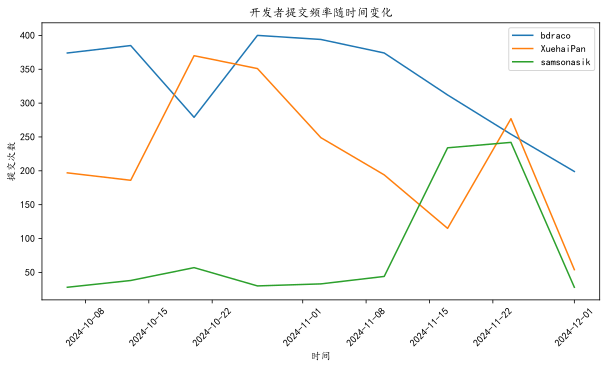

In [42]:
# 选择几个开发者进行可视化
selected_developers = ['bdraco','XuehaiPan','samsonasik']  # 替换为实际的开发者name
plt.figure(figsize=(10,5))
for developer_id in selected_developers:
    developer_submission_data = submission_frequency[submission_frequency['name'] == developer_id]
    plt.plot(developer_submission_data['event_time'], developer_submission_data['submission_count'], label=developer_id)

plt.xlabel('时间')
plt.ylabel('提交次数')
plt.title('开发者提交频率随时间变化')
plt.xticks(rotation=45)
plt.legend()
plt.show()

从图中可以看出：（这里选了这几个用户示范）
- bdraco的提交频率在 2021 - 04 - 08 至 2021 - 07 - 01 期间达到峰值，随后有所下降，但整体仍保持较高的活跃度。
- XuahuaPan的提交频率相对较为平稳，在 2021 - 10 - 07 至 2021 - 12 - 30 期间有较为明显的提交高峰。
- sammonsit的提交频率波动较大，在 2021 - 04 - 08 至 2021 - 07 - 01 期间有较高的提交次数，之后活跃度有所降低。

### 4. 开发者影响力和活跃度的关联分析

In [51]:
def calculate_submission_frequency2(data):
    submission_data = data[data['event_type'] == 'PushEvent']
    submission_frequency = submission_data.groupby(['user_id']).size().reset_index(name='submission_count')
    return submission_frequency
submission_frequency = calculate_submission_frequency2(data) #提交次数

In [58]:
influ = []
s = set()
for i in range(data.shape[0]):
    if data['name'][i] in s or data['event_type'][i] != 'PushEvent':
        continue
    s.add(data['name'][i])
    influ.append(data['total_influence'][i])

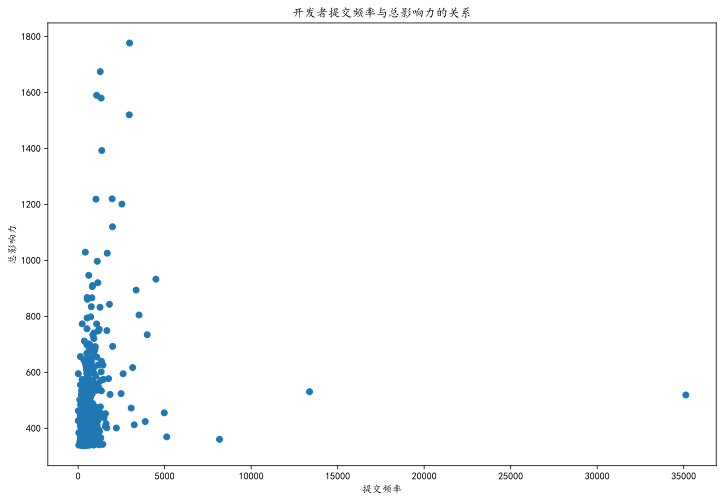

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(submission_frequency['submission_count'], influ)
plt.xlabel('提交频率')
plt.ylabel('总影响力')
plt.title('开发者提交频率与总影响力的关系')
plt.show()

In [68]:
#计算相关系数
correlation = pd.concat([submission_frequency['submission_count'], pd.DataFrame({'total_influence':influ})], axis = 1).corr()
print(correlation)

                  submission_count  total_influence
submission_count          1.000000         0.138122
total_influence           0.138122         1.000000
